In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

In [5]:
# Download seismic data
network = 'IU'
station = 'TATO'
channel = 'BH*'
starttime = UTCDateTime('2024-04-22T23:58:11')
endtime = starttime + 60*15 #15 mins

In [6]:
# Client
client=Client('IRIS')

In [7]:
# Get waveforms
st = client.get_waveforms(network=network, station=station, location='00', channel=channel, starttime=starttime, endtime=endtime, attach_response=True)

In [8]:
# Convert to velocity
st.remove_response(output='VEL')

3 Trace(s) in Stream:
IU.TATO.00.BH1 | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples
IU.TATO.00.BH2 | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples
IU.TATO.00.BHZ | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples

In [10]:
# Pre-processing
st.merge(fill_value='interpolate') # Merge traces if we have gaps
st.detrend(type='linear') # Remove linear trend
st.taper(max_percentage=0.05) # Apply taper

3 Trace(s) in Stream:
IU.TATO.00.BH1 | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples
IU.TATO.00.BH2 | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples
IU.TATO.00.BHZ | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples

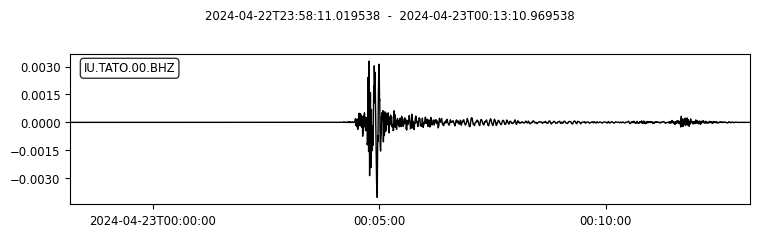

In [11]:
st[2].plot();